In [21]:
import numpy as np

X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

D = np.array([[0], [0], [0], [1]])

In [22]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

In [23]:
def calc_ouput(W, x):
    v = np.matmul(W, x)
    y = sigmoid(v)

    return y

In [24]:
def calc_error(d, y):
    e = d - y
    delta = y*(1-y)*e

    return delta

In [25]:
def delta_GD(W, X, D, alpha):
    for k in range(4):
        x = X[k, :].T
        d = D[k]

        y = calc_ouput(W, x)
        delta = calc_error(d, y)

        dW = alpha*delta*x
        W = W + dW

    return W, delta

In [26]:
W = 2*np.random.random((1, 3)) - 1
alpha = 0.9

hist_W = []
hist_loss = []

for epoch in range(1000):
    W, delta = delta_GD(W, X, D, alpha)

    hist_loss.append(delta)
    hist_W.append(W)

    if epoch % 100 == 0:
        print(W)


[[-0.32169061  0.95906755 -0.12328836]]
[[ 2.64972285  2.61825682 -4.01232632]]
[[ 3.46961966  3.45076529 -5.26508467]]
[[ 3.96090193  3.94823859 -6.01201483]]
[[ 4.30820685  4.29878086 -6.5379984 ]]
[[ 4.5753962   4.56792559 -6.94169353]]
[[ 4.79185215  4.78568163 -7.26823052]]
[[ 4.97342195  4.96817495 -7.54184453]]
[[ 5.12958967  5.12503096 -7.77699368]]
[[ 5.26646571  5.26243896 -7.98297094]]


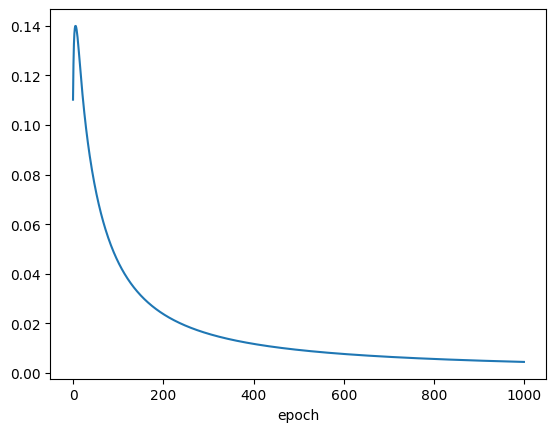

In [27]:
import matplotlib.pyplot as plt

plt.plot(hist_loss)
plt.xlabel('epoch')
plt.show()

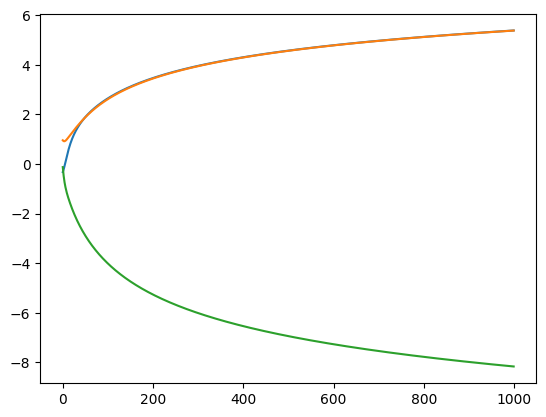

In [28]:
plt.plot(np.array(hist_W).reshape(-1,3));

In [29]:
N = 4
for k in range(N):
    x = X[k, :].T
    y= calc_ouput(W, x)

    print(y)

[0.00028454]
[0.05836463]
[0.05856321]
[0.93125627]


In [30]:
def calc_ouput(W1, W2, x):
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    v = np.matmul(W2, y1)
    y = sigmoid(v)

    return y, y1

In [31]:
def calc_delta(d, y):
    e = d - y
    delta = y*(1-y) * e

    return delta

In [32]:
def calc_delta1(W2, delta, y1):
    e1 = np.matmul(W2.T, delta)
    delta1 = y1*(1-y1) * e1

    return delta1

In [33]:
def backprop_XOR(W1, W2, X, D, alpha):
    for k in range(4):
        x = X[k, :].T
        d = D[k]

        y, y1 = calc_ouput(W1, W2, x)
        delta = calc_delta(d, y)
        delta1 = calc_delta1(W2, delta, y1)

        dW1 = (alpha*delta1).reshape(4, 1) * x.reshape(1, 3)
        W1 = W1 + dW1

        dW2 = alpha * delta * y1
        W2 = W2 + dW2

    return W1, W2

In [35]:
X = np.array([[0, 0, 1],
             [0, 1, 1],
             [1, 0 ,1],
             [1, 1, 1,]])

D = np.array([[0], [1], [1], [0]])

W1 = 2*np.random.random((4, 3)) - 1
W2 = 2*np.random.random((1, 4)) - 1

In [36]:
alpha = 0.9
for epoch in range(10000):
    W1, W2 = backprop_XOR(W1, W2, X, D, alpha)

In [37]:
N = 4
for k in range(4):
    x = X[k ,:].T
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    v = np.matmul(W2, y1)
    y = sigmoid(v)

    print(y)

[0.01103248]
[0.99125203]
[0.98854827]
[0.00978094]
